<a href="https://colab.research.google.com/github/edisonshui/Wildfire-Object-Detection-Berkeley-MET/blob/main/Wildfire_NewData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
!pip install ultralytics
!pip install Roboflow

In [ ]:
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
rf = Roboflow(api_key="tIDpMtk6gwfXTK5sfWCh")
project = rf.workspace("edison-gcjpk").project("wildfire-dataset-v2")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=train model=/content/drive/MyDrive/ColabNotebooks/runs_yolo11_biggerDataset/detect/train2/weights/last.pt data=/content/wildfire-dataset-v2-1/data.yaml epochs=75 batch=32 imgsz=640 plots=True

Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/wildfire-dataset-v2-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=75, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/ColabNotebooks/runs_yolo11_biggerDataset/detect/train2/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, op

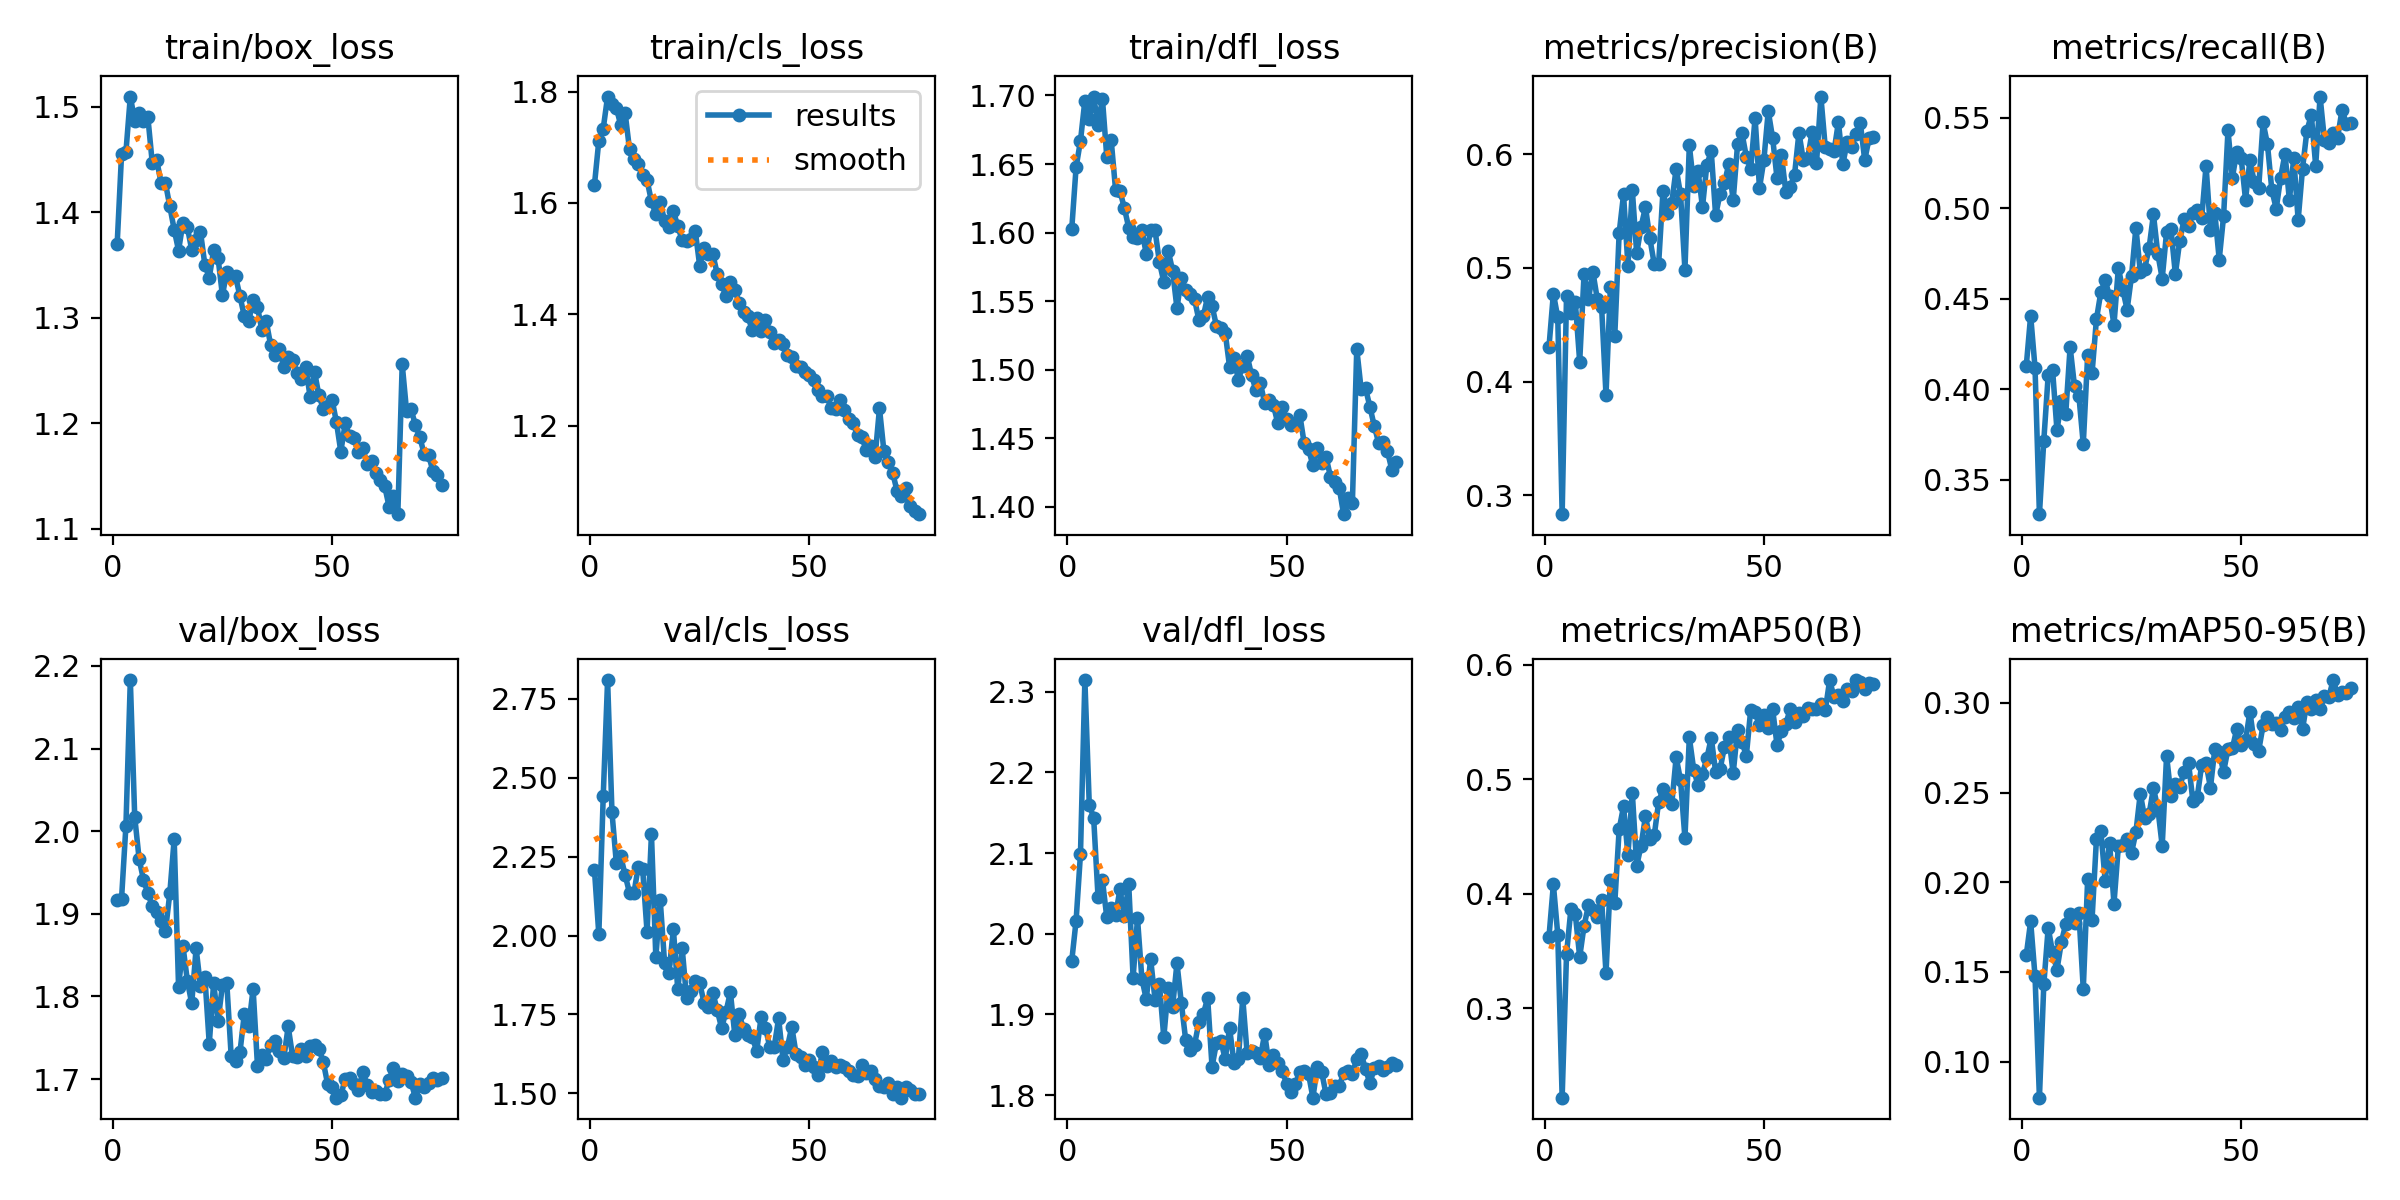

In [ ]:
Image(filename=f'/content/runs/detect/train4/results.png', width=600)

In [ ]:
# Validation
!yolo task=detect mode=val model=/content/runs/detect/train4/weights/best.pt data=/content/wildfire-dataset-v2-1/data.yaml

Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1186.4±605.7 MB/s, size: 29.6 KB)
val: Scanning /content/wildfire-dataset-v2-1/valid/labels.cache... 414 images, 1 backgrounds, 0 corrupt: 100% 414/414 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 26/26 [00:06<00:00,  3.94it/s]
                   all        414       1196      0.619      0.542      0.588      0.313
                 smoke        355        551      0.667      0.525      0.597      0.335
              wildfire        248        645      0.571       0.56      0.578       0.29
Speed: 0.6ms preprocess, 10.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val
